<a href="https://colab.research.google.com/github/Ws995566/Scientific-Computing-smt2/blob/main/2802401846_Wesley_Sumedha_Deano_AOL_Scientific_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

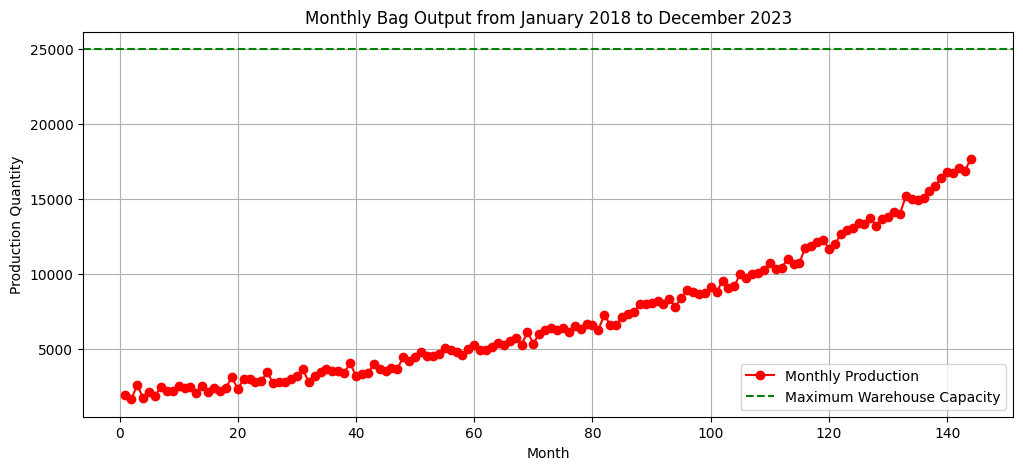

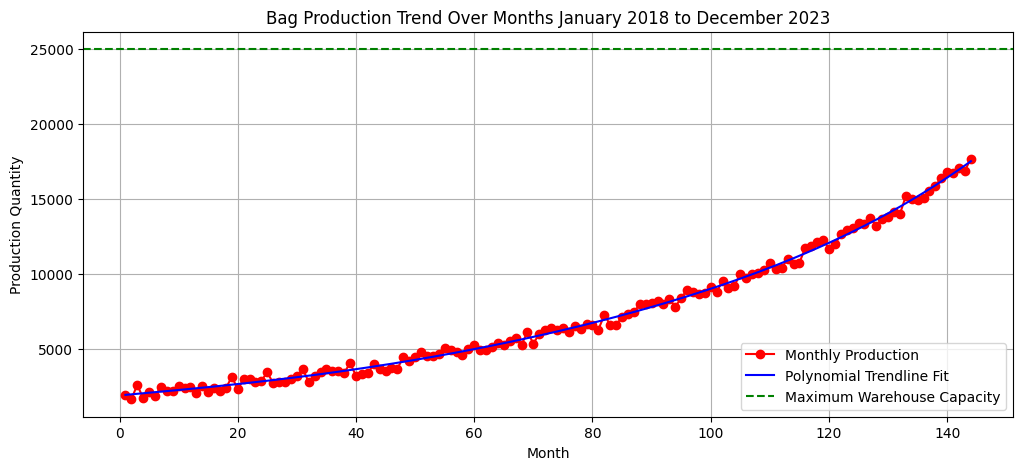

Month when production prediction exceeds capacity:  24.35
EIGER needs to start building a new warehouse on month: 11.35


In [16]:
# WESLEY SUMEDHA DEANO - 2802401846 - AOL SCIENTIFIC COMPUTING

import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

# Raw data of monthly production from January 2018 to December 2023
monthly_production = [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358,
                      2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997,
                      2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141,
                      3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649,
                      3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036,
                      4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520,
                      5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497,
                      6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976,
                      7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705,
                      9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740,
                      10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666,
                      11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808,
                      14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388, 16782,
                      16716, 17033, 16896, 17689]

# Array representing months from 1 to 144 (January 2018 to December 2023)
months_array = np.arange(1, 145).reshape(-1, 1)

# Generate polynomial features of degree 5
poly_features = PolynomialFeatures(degree=5)
months_poly = poly_features.fit_transform(months_array)

# Fit a polynomial regression model to the data
polynomial_model = LinearRegression()
polynomial_model.fit(months_poly, monthly_production)

# Predict production using the fitted polynomial model
predicted_production = polynomial_model.predict(months_poly)

# Evaluate the model
#mean_squared_error_value = mean_squared_error(monthly_production, predicted_production)
#r2_value = r2_score(monthly_production, predicted_production)

# Define the maximum warehouse capacity and the lead time to build a new warehouse
warehouse_capacity = 25000
warehouse_build_time = 13

# Plot the raw monthly production data
plt.figure(figsize=(12, 5))
plt.plot(months_array, monthly_production, label='Monthly Production', marker='o', color='red')
plt.axhline(y=warehouse_capacity, color='green', linestyle='--', label='Maximum Warehouse Capacity')
plt.xlabel('Month')
plt.ylabel('Production Quantity')
plt.title('Monthly Bag Output from January 2018 to December 2023')
plt.legend()
plt.grid(True)
plt.show()

# Get the coefficients of the fitted polynomial model
model_coefficients = polynomial_model.coef_
model_coefficients = np.insert(model_coefficients, 0, polynomial_model.intercept_)

# Define a function to find the difference between production and warehouse capacity
def find_capacity_difference(month):
    return sum([model_coefficients[i] * (month ** i) for i in range(len(model_coefficients))]) - warehouse_capacity

# Use fsolve to find the month when production will exceed the warehouse capacity
capacity_exceed_month = fsolve(find_capacity_difference, 145)[0]

# Calculate the month to start building the new warehouse
start_build_month = capacity_exceed_month - warehouse_build_time

# Plot the raw data and the fitted polynomial model
plt.figure(figsize=(12, 5))
plt.plot(months_array, monthly_production, label='Monthly Production', marker='o', color='red')
plt.plot(months_array, predicted_production, label='Polynomial Trendline Fit', color='blue')
plt.axhline(y=warehouse_capacity, color='green', linestyle='--', label='Maximum Warehouse Capacity')

plt.xlabel('Month')
plt.ylabel('Production Quantity')
plt.title('Bag Production Trend Over Months January 2018 to December 2023')
plt.legend()
plt.grid(True)
plt.show()

# Printing the results with 2 decimal places
print(f"Month when production prediction exceeds capacity:  {capacity_exceed_month:.2f}")
print(f"EIGER needs to start building a new warehouse on month: {start_build_month:.2f}")

# Printing the Mean Squared Error (MSE) value to evaluate the model's performance
#print(f"Mean Squared Error: {mean_squared_error_value}")

# Printing the R-squared (R^2) value to evaluate how well our model fits the actual data
#print(f"R-squared: {r2_value}")

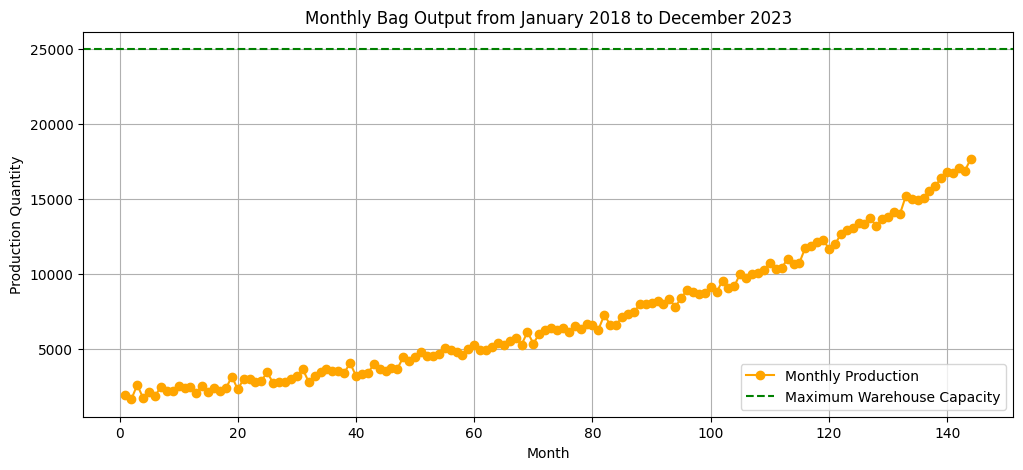

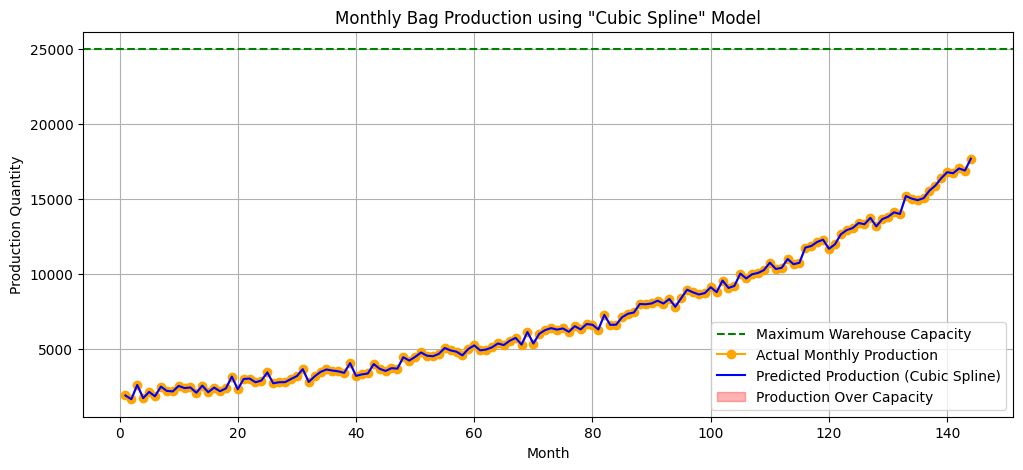

Capacity will be exceeded around month: 145.47
EIGER needs to start building a new warehouse on month:132.47


In [19]:
# WESLEY SUMEDHA DEANO - 2802401846 - AOL SCIENTIFIC COMPUTING

import numpy as np
#import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
from sklearn.metrics import mean_squared_error, r2_score

# Define the maximum warehouse capacity
max_capacity = 25000

# Monthly production data for the period from January 2018 to December 2023
production_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Generate an array of months from M1 to M144
months_array = np.arange(1, 145)

# Plot the raw monthly production data
plt.figure(figsize=(12, 5))
plt.plot(months_array, monthly_production, label='Monthly Production',color ='red' ,  marker='o')
plt.axhline(y=warehouse_capacity, color='green', linestyle='--', label='Maximum Warehouse Capacity')
plt.xlabel('Month')
plt.ylabel('Production Quantity')
plt.title('Monthly Bag Output from January 2018 to December 2023')
plt.legend()
plt.grid(True)
plt.show()

# Convert the production data to a NumPy array
production_data_np = np.array(production_data)

# Fit the data to a cubic spline model
cubic_spline_model = CubicSpline(months_array, production_data_np)

# Make predictions using the cubic spline model
predicted_values = cubic_spline_model(months_array)

# Model evaluation metrics
#mse_result = mean_squared_error(production_data_np, predicted_values)
#r2_result = r2_score(production_data_np, predicted_values)

warehouse_build_time = 13

initial_guess = 145

def cap_diff(x):
    return cubic_spline_model(x) - max_capacity

cap_exceeded_month = fsolve(cap_diff, initial_guess)[0]
start_building_month= cap_exceeded_month - warehouse_build_time

# Visualize the results
plt.figure(figsize=(12, 5))
plt.axhline(y=max_capacity, color='green', linestyle='--', label='Maximum Warehouse Capacity')
plt.plot(months_array, production_data_np, marker='o', color ='red', linestyle='-', label='Actual Monthly Production')
plt.plot(months_array, predicted_values, color='blue', linestyle='-', label='Predicted Production (Cubic Spline)')
plt.fill_between(months_array, production_data_np, max_capacity, where=(production_data_np > max_capacity),
                 color='red', alpha=0.3, label='Production Over Capacity')
plt.title('Monthly Bag Production using "Cubic Spline" Model')
plt.xlabel('Month')
plt.ylabel('Production Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Printing the results with 2 decimal places
print(f"Capacity will be exceeded around month: {cap_exceeded_month:.2f}")
print(f"EIGER needs to start building a new warehouse on month:{start_building_month:.2f}")

# Printing the Mean Squared Error (MSE) value to evaluate the model's performance
#print(f"Mean Squared Error: {mse_result}")

# Printing the R-squared (R^2) value to evaluate how well our model fits the actual data
#print(f"R-squared: {r2_result}")

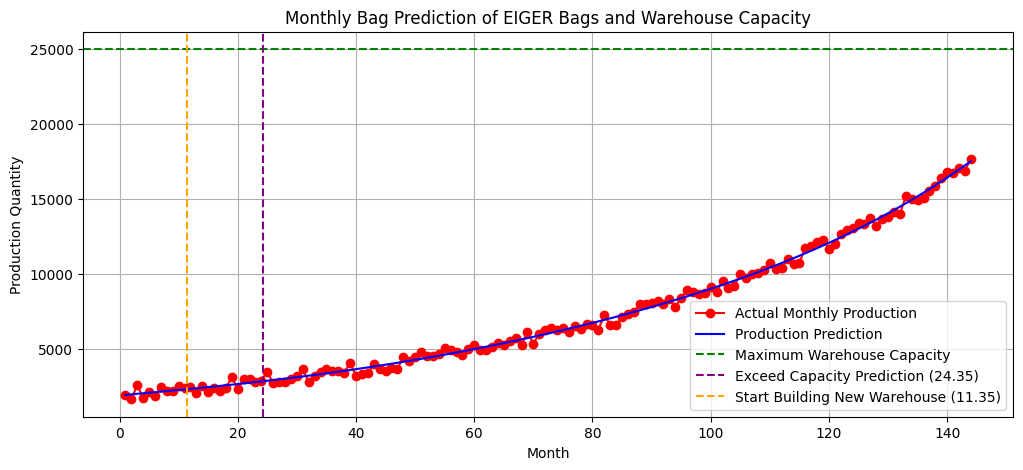

Month when production prediction exceeds capacity: 24.35
EIGER needs to start building a new warehouse on month: 11.35


In [23]:
# WESLEY SUMEDHA DEANO - 2802401846 - AOL SCIENTIFIC COMPUTING

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import fsolve

# Monthly production data from January 2018 to December 2023
production_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Creating an array of months from M1 to M144
months = np.arange(1, 145).reshape(-1, 1)

# Using Polynomial Regression
poly = PolynomialFeatures(degree=5)
months_poly = poly.fit_transform(months)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(months_poly, production_data)

# Getting the polynomial coefficients
coefficients = model.coef_
intercept = model.intercept_

# Creating the polynomial function
def polynomial(x):
    return sum(coeff * x**i for i, coeff in enumerate(coefficients, start=1)) + intercept - 25000

# Finding the root of the polynomial equation
initial_guess = 145  # Initial guess after the given data
root = fsolve(polynomial, initial_guess)[0]

# Subtracting 13 months to determine the start of building a new warehouse
start_building_month = root - 13

# Visualizing the results
predicted_production = model.predict(months_poly)

plt.figure(figsize=(12, 5))
plt.plot(months, production_data, marker='o', linestyle='-', color='red', label='Actual Monthly Production')
plt.plot(months, predicted_production, color='blue', linestyle='-', label='Production Prediction')
plt.axhline(y=25000, color='green', linestyle='--', label='Maximum Warehouse Capacity')
plt.axvline(x=root, color='purple', linestyle='--', label=f'Exceed Capacity Prediction ({root:.2f})')
plt.axvline(x=start_building_month, color='orange', linestyle='--', label=f'Start Building New Warehouse ({start_building_month:.2f})')
plt.title('Monthly Bag Prediction of EIGER Bags and Warehouse Capacity')
plt.xlabel('Month')
plt.ylabel('Production Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Printing the results with 2 decimal places
print(f"Month when production prediction exceeds capacity: {root:.2f}")
print(f"EIGER needs to start building a new warehouse on month: {start_building_month:.2f}")